# Decision Tree Calssifier:

In [82]:
#imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [84]:
#reading csv files from download
df = pd.read_csv('../../data/data/train-metadata.csv', low_memory=False)
missing_percentages = (df.isnull().sum() / len(df)) * 100
columns_to_keep = missing_percentages[missing_percentages < 50].index
skin_cancer_df= df[columns_to_keep]
skin_cancer_df = skin_cancer_df.fillna(skin_cancer_df.mode().iloc[0])
skin_cancer_df.shape

# Separate features (X) and target (y)
X = skin_cancer_df.drop(columns=['target'])  # Replace 'target' with your actual column name
y = skin_cancer_df['target']

# Check for non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
# (encode the non-numeric data into numeric values using)

# Initialize a LabelEncoder to assign an integer to each category.
label_encoders = {}
# Encode each non-numeric column
for column in non_numeric_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le 


In [85]:
# Distribution of the target variable
skin_cancer_df['target'].value_counts()

# not balanced since there are more counts of 0 than 1 -> maybe struggle to learn from minorityÍ

target
0    400666
1       393
Name: count, dtype: int64

In [86]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [87]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after SMOTE:
target
0    320533
1    320533
Name: count, dtype: int64


In [88]:
# "skin_cancer_decisiontree" is instantiated as an "object" of DecisionTreeClassifier "class". 
# Train a DecisionTreeClassifier on the resampled dataset
skin_cancer_decisiontree = DecisionTreeClassifier(
    class_weight="balanced", 
    max_depth=5, 
    min_samples_split=5, 
    random_state=42
)


In [89]:
#use the method "fit" of the objects "my_decisiontree" along with training dataset and labels to train the model.

skin_cancer_decisiontree.fit(
    X_train_resampled, 
    y_train_resampled
)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5, random_state=42)

In [90]:
# Testing on the testing set:

y_predict = skin_cancer_decisiontree.predict(X_test)

[Text(0.5, 0.75, 'x[45] <= 1.5\ngini = 0.5\nsamples = 641066\nvalue = [320533, 320533]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 320533\nvalue = [320533, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 320533\nvalue = [0, 320533]')]

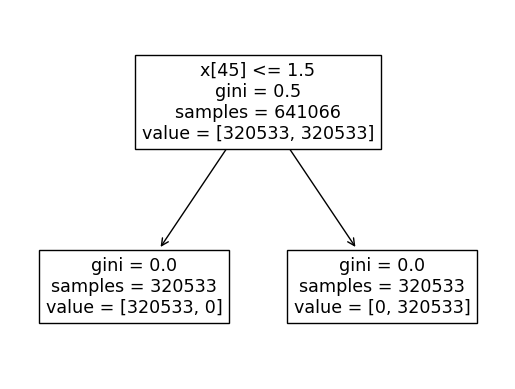

In [91]:
from sklearn import tree

tree.plot_tree(skin_cancer_decisiontree)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80133
           1       1.00      1.00      1.00        79

    accuracy                           1.00     80212
   macro avg       1.00      1.00      1.00     80212
weighted avg       1.00      1.00      1.00     80212

Confusion Matrix:


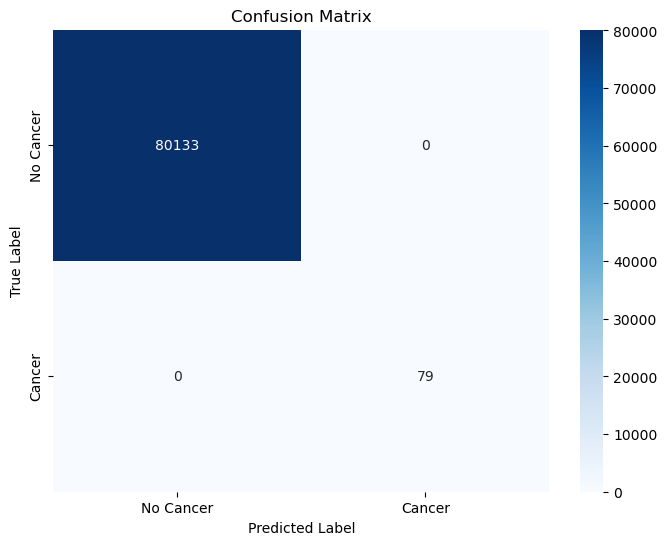

In [92]:
# Evaluate predictions
import matplotlib.pyplot as plt
import seaborn as sns
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_predict))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Cancer', 'Cancer'],
            yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [93]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(skin_cancer_decisiontree, X, y, cv=10, scoring='accuracy')
print("Mean cross-validation accuracy:", scores.mean())


Mean cross-validation accuracy: 1.0
